In [932]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
import pandas as pd
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import numpy as np
# Loading the Boston housing dataset
# housing = fetch_openml(name="house_prices", as_frame=True)



In [933]:
split_df =  pd.read_csv('split_df.csv',encoding='utf-8-sig')

In [934]:
# split_df.drop('Name', axis=1, inplace=True)

# Create a new "ID" column with sequential numbers starting from 1
split_df['ID'] = range(1, len(split_df) + 1)

In [935]:
# split_df.dropna(inplace=True)
sp = split_df.drop(['Table 1','Gender','ID','Name','Eye','Age','Spectacles','id'],axis=1)
sp.dropna(inplace=True)
y_data = sp['Diagnosis']
X_data = sp.drop('Diagnosis',axis=1)

In [936]:
X_data

,VA,CDR,IOP
0,0.6,0.5,14.0
1,0.7,0.9,23.0
3,9.0,0.8,40.0
4,1.0,0.5,15.0
5,1.0,0.4,14.0
...,...,...,...
84,0.2,0.8,10.0
86,0.3,0.5,15.0
87,0.6,0.7,16.0
88,0.5,0.3,15.0


In [937]:
# X_data.dropna(inplace=True)


In [938]:
X_data

,VA,CDR,IOP
0,0.6,0.5,14.0
1,0.7,0.9,23.0
3,9.0,0.8,40.0
4,1.0,0.5,15.0
5,1.0,0.4,14.0
...,...,...,...
84,0.2,0.8,10.0
86,0.3,0.5,15.0
87,0.6,0.7,16.0
88,0.5,0.3,15.0


In [939]:
y_data.head()

0    0
1    1
3    1
4    0
5    0
Name: Diagnosis, dtype: int64

In [940]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=44, shuffle=True)


In [941]:
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_classif, k=3),  # Select the top 5 features based on ANOVA F-value
    BaggingClassifier(
        KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', p=2),  # p=2 for Euclidean distance (L2)
        n_estimators=10,  # Number of base estimators in the ensemble
        random_state=42
    )
)


In [942]:
# KNNClassifierModel = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto',p=2)
# KNNClassifierModel.fit(X_train_imputed, y_train)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=3)),
                ('baggingclassifier',
                 BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                                   random_state=42))])

In [943]:
print('KNeighborsClassifier Train Score is : ', pipeline.score(X_train, y_train))
print('KNeighborsClassifier Test Score is : ', pipeline.score(X_test, y_test))


KNeighborsClassifier Train Score is :  0.9047619047619048
KNeighborsClassifier Test Score is :  0.8571428571428571


In [944]:
y_pred = pipeline.predict(X_test)
print('Predicted Value for KNeighborsClassifier is : ', y_pred[:10])

y_pred_prob = pipeline.predict_proba(X_test)


# Calculating mean absolute error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

# Calculating mean squared error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

# Calculating median squared error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue)

print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for KNeighborsClassifier is :  [0 0 1 1 1 0 0]
Mean Absolute Error Value is :  0.14285714285714285
Mean Squared Error Value is :  0.14285714285714285
Median Squared Error Value is :  0.0
Predicted Value for KNNClassifierModel is :  [0 0 1 1 1 0 0]
Prediction Probabilities Value for KNNClassifierModel is :  [[0.56666667 0.43333333]
 [0.7        0.3       ]
 [0.2        0.8       ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.7        0.3       ]]


In [945]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7

Confusion Matrix:
[[4 1]
 [0 2]]


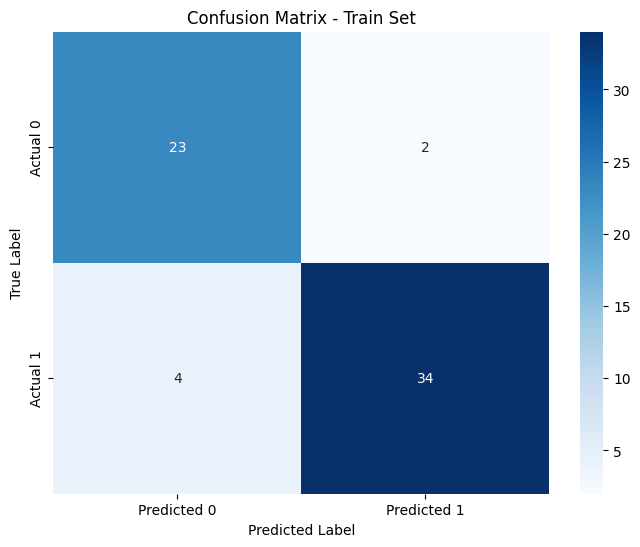

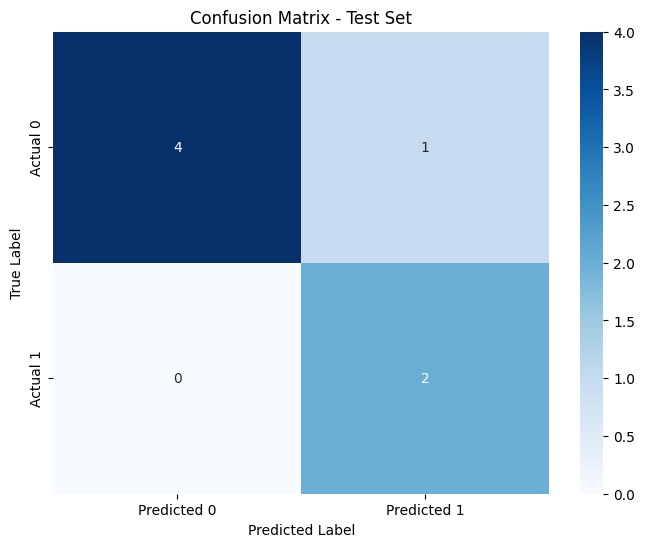

In [946]:
# Calculate confusion matrix for train and test sets
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

train_cm = confusion_matrix(y_train, train_predictions)
test_cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix for train set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


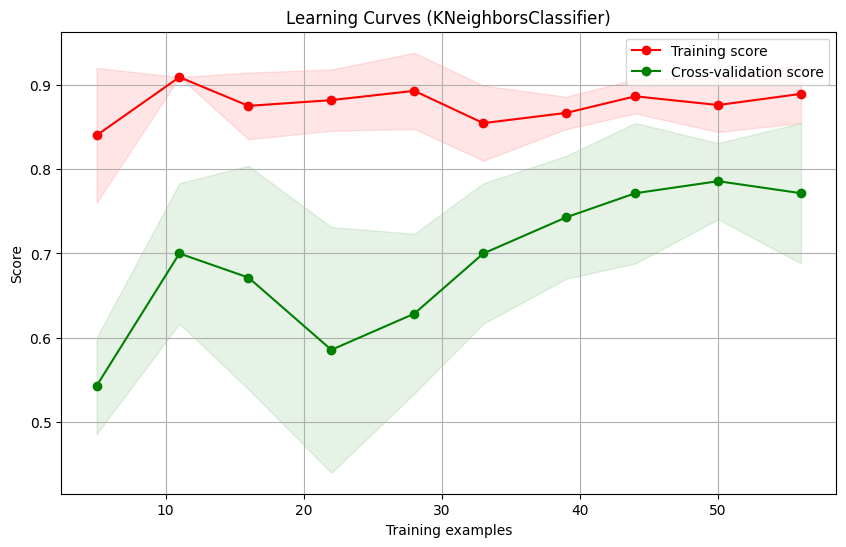

In [947]:
# Define function to plot learning curves
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot learning curves for the model
plot_learning_curve(pipeline, X_data, y_data, "Learning Curves (KNeighborsClassifier)")
plt.show()
